In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
emotions_df = pd.read_csv("/Users/ernazerkinbekov/Desktop/course_project_ML/Text Emotion Detection/data/emotion_dataset_raw.csv")

In [3]:
tweets_df = pd.read_csv("/Users/ernazerkinbekov/Desktop/course_project_ML/Text Emotion Detection/data/tweet_emotions.csv")

In [4]:
emotions_df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

In [9]:
tweets_df['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

In [13]:
import pandas as pd

emotions_df = pd.read_csv(
    "/Users/ernazerkinbekov/Desktop/course_project_ML/Text Emotion Detection/data/emotion_dataset_raw.csv")
tweets_df = pd.read_csv(
    "/Users/ernazerkinbekov/Desktop/course_project_ML/Text Emotion Detection/data/tweet_emotions.csv")

mapping = {
    'neutral': 'neutral',
    'worry': 'fear',
    'happiness': 'joy',
    'sadness': 'sadness',
    'hate': 'anger',
    'empty': 'sadness'
}

tweet_emotions_filtered = tweets_df[tweets_df['sentiment'].isin(mapping.keys())]
tweet_emotions_filtered['Emotion'] = tweet_emotions_filtered['sentiment'].map(mapping)
tweet_emotions_filtered = tweet_emotions_filtered[['Emotion', 'content']]
tweet_emotions_filtered.columns = ['Emotion', 'Text']

fun_to_joy = tweets_df[tweets_df['sentiment'] == 'fun'].copy()
fun_to_joy['Emotion'] = 'joy'
fun_to_joy = fun_to_joy[['Emotion', 'content']]
fun_to_joy.columns = ['Emotion', 'Text']

all_emotions = pd.concat([emotions_df, tweet_emotions_filtered, fun_to_joy], ignore_index=True)

all_emotions.to_csv("all_emotions.csv", index=False)

print("Dataset all_emotions.csv created successfully!")



Dataset all_emotions.csv created successfully!


/var/folders/y8/ndh9qhzj7t98rv05wws177ph0000gn/T/ipykernel_4676/1532664447.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_emotions_filtered['Emotion'] = tweet_emotions_filtered['sentiment'].map(mapping)


<Axes: xlabel='Emotion', ylabel='count'>

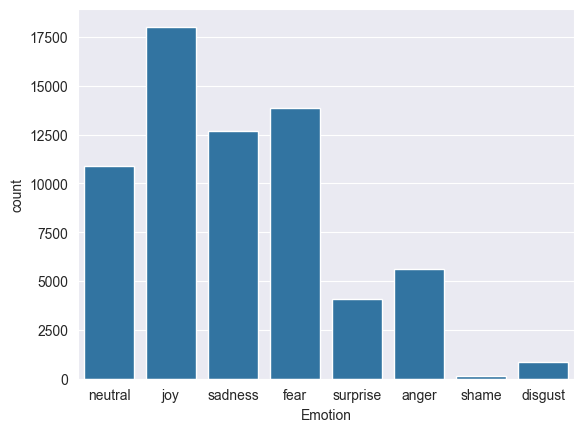

In [15]:
df = pd.read_csv('all_emotions.csv')
sns.countplot(x='Emotion',data=df)

